In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("Diabetes_XTrain.csv")

In [3]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [4]:
test = pd.read_csv("Diabetes_YTrain.csv")

In [5]:
test

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [6]:
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

In [7]:
!pip install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.3 MB 121 kB/s eta 0:00:01
     |████████████████████████████████| 67 kB 76 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 142 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 219 kB/s eta 0:00:01


In [10]:
test.describe()

,Outcome
count,576.000000
mean,0.348958
std,0.477055
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
np.sum(test) ## means we have 201 tru values and remaining false 

Outcome    201
dtype: int64

In [42]:
true = np.sum(test)
true = list(true)
true= true[0]

In [43]:
true

201

In [44]:
test.shape

(576, 1)

In [45]:
false = test.shape[0] - true

In [46]:
false

375

<BarContainer object of 2 artists>

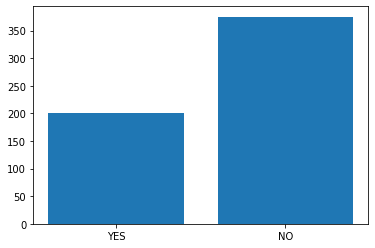

In [47]:
plt.bar(["YES","NO"],[true,false])

In [48]:
### we need to find distance of each x values of given data from each y values 

In [49]:
xg = np.array(train) ## given x 

In [50]:
xg.shape

(576, 8)

In [51]:
yg = np.array(test) ## given y

In [52]:
yg.shape

(576, 1)

In [53]:
## now get dataset to predict
x = np.array(pd.read_csv("Diabetes_Xtest.csv"))

In [85]:
xg.shape,yg.shape

((576, 8), (576, 1))

In [86]:
def knn(X,Y,val,k = 5):
    dist = []
    n,m = X.shape
    for i in range(n):
        d = 0.0
        for j in range(m):
            d += (X[i][j] - val[j])**2
        dist.append((d**(.5),Y[i][0]))
    dist.sort()
    dist = dist[:5] ## take top 5 values
    val = np.unique(dist,return_counts=True)
    index = np.argmax(val[1])
    return val[0][index]

In [87]:
knn(xg,yg,x[0])

1.0

In [88]:
knn(xg,yg,xg[0]),yg[0]

(1.0, array([1]))

In [103]:
trainpred = []
count =0
for i in range(xg.shape[0]):
    count+=1
    trainpred.append(knn(xg,yg,xg[i]))
print(count)
trainpred = np.array(trainpred)
trainpred.reshape((-1,1))
trainpred.shape

576


(576,)

In [104]:
yg = yg.reshape((-1))

In [105]:
yg.shape

(576,)

In [107]:
correct = np.sum(trainpred == yg)
correct

450

In [ ]:
### we got 450 correct out of given about 600 

In [109]:
accuracy = correct/(yg.shape[0])
accuracy ### 80 % accuracy on training data itself testing data is going to have bad results we need to try other model

0.78125

In [80]:
pred = []
for i in range(x.shape[0]):
    pred.append(knn(xg,yg,x[i]))
pred = np.array(pred)

In [82]:
pred.shape

(192,)

In [66]:
df = pd.DataFrame(pred)

In [67]:
df.to_csv("predictions.csv")